In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math

%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=True)
#reload(c)

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/tim/venvs/analysis-venv-2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
sources = pandas.read_csv("../data/sources.csv", index_col="source_id")


In [3]:
df = pandas.read_csv("../data/deconstructsigs_output.csv", index_col=0)
df.columns = [x.replace(".", " ").replace("  ", " ") for x in df.columns]
df["kind"] = [x.split()[-1] for x in df.Sample]
df["source_id"] = [x.split()[0] for x in df.Sample]
del df["Sample"]
df = df.set_index(["source_id", "kind"], drop=False)
df = df.loc[:,(df != 0).any(axis=0)]
signatures = sorted([x for x in df.columns if x not in ('kind', 'source_id')], key=lambda x: x[0])
df["treated"] = [sources.ix[s].treated if s in sources.index else False for s in df.source_id]
df.to_csv("../data/deconstructsigs_output.cleaned.csv")
df

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans fcd 2,Cisplatin C Elegans polq 1,Cisplatin C Elegans xpf 1,kind,source_id,treated
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-166-1/SP102133,all,0.000000,0.000000,0.000000,0.000000,0.000000,0.063701,0.000000,0.250905,0.000000,0.514761,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.094825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-166-1/SP102133,False
AOCS-092-13/SP101630,new,0.000000,0.000000,0.133002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.094217,0.120342,0.141969,0.000000,0.000000,0.000000,0.080833,0.152453,0.000000,0.000000,0.000000,0.145093,new,AOCS-092-13/SP101630,True
AOCS-119-13/SP101732,all,0.000000,0.000000,0.217817,0.000000,0.000000,0.000000,0.473673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.071525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-119-13/SP101732,True
AOCS-117-13/SP101724,all,0.000000,0.000000,0.243353,0.000000,0.000000,0.000000,0.310672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067353,0.000000,0.000000,0.000000,0.000000,all,AOCS-117-13/SP101724,True
AOCS-135-13/SP101855,all,0.000000,0.000000,0.272220,0.000000,0.103954,0.000000,0.397365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-135-13/SP101855,True
AOCS-135-14/SP101860,all,0.000000,0.000000,0.276793,0.000000,0.110276,0.000000,0.386780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-135-14/SP101860,True
AOCS-150-13/SP102010,all,0.000000,0.000000,0.293942,0.000000,0.000000,0.000000,0.239073,0.000000,0.000000,0.000000,0.000000,0.000000,0.078714,0.00000,0.069938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074023,0.000000,0.000000,all,AOCS-150-13/SP102010,True
AOCS-004-1/SP101519,all,0.000000,0.000000,0.325053,0.000000,0.176914,0.000000,0.134828,0.000000,0.000000,0.000000,0.000000,0.000000,0.088918,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-004-1/SP101519,False
AOCS-088-1/SP101610,all,0.000000,0.000000,0.331926,0.000000,0.000000,0.000000,0.437654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-088-1/SP101610,False


In [4]:
df.columns

Index([u'Signature 1', u'Signature 2', u'Signature 3', u'Signature 4',
       u'Signature 5', u'Signature 6', u'Signature 8', u'Signature 9',
       u'Signature 10', u'Signature 12', u'Signature 13', u'Signature 14',
       u'Signature 16', u'Signature 18', u'Signature 19', u'Signature 22',
       u'Signature 23', u'Signature 25', u'Signature 26', u'Signature 29',
       u'Cisplatin Gallus gallus', u'Cyclophosphamide Gallus gallus',
       u'Etoposide Gallus gallus', u'Cisplatin C Elegans fcd 2',
       u'Cisplatin C Elegans polq 1', u'Cisplatin C Elegans xpf 1', u'kind',
       u'source_id', u'treated'],
      dtype='object')

In [15]:
def make_draw_df(draw_df):
    signature_descriptions = {
        1: 'Age',
        3: 'BRCA',
        4: 'Smoking',
        6: 'MMR',
        9: 'AID',
        10: 'POLE',
        13: 'AID',
        #22: 'Arist.',
        26: 'MMR',
        29: 'Tobacco',
    }
    column_renames = {
        'Cisplatin Gallus gallus': "Cisplatin \\textit{Gallus gallus}",
        'Chicken cyclophosphamide': 'Cyc.',
        'Chicken etoposide': 'Etoposide',
    }
    column_renames.update(
        dict(("Signature %d" % num, ("(%d) %s" % (num, signature_descriptions.get(num, ''))).strip())
                  for num in range(30)))
    '''
    if 'treated' in draw_df.columns:
        draw_df["treated"] = (draw_df.treated == True).astype(float)
        draw_df["unique"] = (draw_df.kind == "new").astype(float)
        draw_df["control"] = (draw_df.kind == "check").astype(float)
        draw_df = draw_df[["treated", "unique", "control"] + signatures]
    else:
        draw_df = draw_df[signatures]
    '''

    draw_df.index = [x[0] for x in draw_df.index]
    draw_df = draw_df.ix[sorted(draw_df.index)]
    draw_df.columns = [
        column_renames.get(x, x)
        .replace("Gallus gallus", "\\textit{G. gallus}")
        .replace("Gallus gallus", "\\textit{G. gallus}")
        .replace("C Elegans", "\\textit{C. Elegans}")
        .replace("fcd 2", "\\textit{fcd-2$^-$}")
        .replace("xpf 1", "\\textit{xpf-1$^-$}")
        .replace("polq 1", "\\textit{polq-1$^-$}")
        for x in draw_df.columns
    ]
    return draw_df

In [6]:
treatments_df = pandas.read_csv("../data/treatments.csv").dropna()
donor_to_treatments = collections.defaultdict(set)
for (i, row) in treatments_df.iterrows():
    donor_to_treatments[row.submitted_donor_id].add(row["DRUG NAME"])
counts = treatments_df["DRUG NAME"].value_counts()
donor_to_treatments = dict(
    (key, sorted(value, key=counts.get, reverse=True))
     for (key, value) in donor_to_treatments.items())
donor_to_treatments

donors = sorted(sources.donor)
counts = treatments_df["DRUG NAME"].value_counts()
treatment_matrix_df = pandas.DataFrame(
    collections.OrderedDict(
        (drug, [
                row.treated and drug in donor_to_treatments.get(row.donor, []) for (_, row) in sources.iterrows()
        ]) for drug in counts.index),
    index=sources.index)
treatment_matrix_df

,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,docetaxel,bevacizumab,farletuzumab/placebo,nab-paclitaxel,etoposide
source_id,,,,,,,,,,,,,
AOCS-001-1/SP101515,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-002-1/SP101517,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-004-1/SP101519,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-005-1/SP101521,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-13/SP101524,True,True,True,True,False,True,False,False,False,False,False,False,False
AOCS-034-1/SP101523,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-055-1/SP101526,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-056-1/SP101528,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-057-1/SP101530,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
signatures

['Cisplatin Gallus gallus',
 'Cyclophosphamide Gallus gallus',
 'Cisplatin C Elegans fcd 2',
 'Cisplatin C Elegans polq 1',
 'Cisplatin C Elegans xpf 1',
 'Etoposide Gallus gallus',
 'Signature 1',
 'Signature 2',
 'Signature 3',
 'Signature 4',
 'Signature 5',
 'Signature 6',
 'Signature 8',
 'Signature 9',
 'Signature 10',
 'Signature 12',
 'Signature 13',
 'Signature 14',
 'Signature 16',
 'Signature 18',
 'Signature 19',
 'Signature 22',
 'Signature 23',
 'Signature 25',
 'Signature 26',
 'Signature 29']

In [75]:
def make_symbol_labels(sigs, treats):
    result = []
    for (col_num, signature) in enumerate(sigs.columns):
        cisplatin_sig = 'cisplatin' in signature.lower()
        cyc_sig = 'cyclophosphamide' in signature.lower()
        etoposide_sig = 'etoposide' in signature.lower()
        for (row_num, sample) in enumerate(sigs[signature].index):
            if sigs[signature][sample] > 0:
                sample_treatments = set(treats.columns[treats.ix[sample]])
                symbol = None
                if cisplatin_sig:
                    if "cisplatin" in sample_treatments:
                        symbol = "*"
                    elif any('platin' in t for t in sample_treatments):
                        symbol = "+"
                    else:
                        symbol = "?"
                if cyc_sig:
                    if 'cyclophosphamide' in sample_treatments:
                        symbol = "*"
                    else:
                        symbol = "?"
                if etoposide_sig:
                    if 'etoposide' in sample_treatments:
                        symbol = "*"
                    else:
                        symbol = "?"
                if symbol is not None:
                    result.append((row_num, col_num, symbol))   
    return result

def draw_from_chunks(chunks, figsize, cbar=True, cbar_bbox_to_anchor=(-0.125, 7.25, 1.05, 0.95), symbols=False, small_fontsize=4):
    col_removes = [col for col in chunks[0][1].columns if all(c[col].sum() == 0 for (_, c) in chunks)]
    print("Removing columns: %s" % ', '.join(col_removes))
    for col in col_removes:
        for (_, chunk) in chunks:
            del chunk[col]
    
    signatures = sorted(
        [c for c in chunks[0][1].columns if c not in ('source_id', 'treated', 'unique', 'control', 'kind')],
        key=lambda x: ('Signature' in x))
    
    seaborn.set_context('paper')
    seaborn.set_style('white')
    
    fig = pyplot.figure(figsize=figsize)
    gs = list(matplotlib.gridspec.GridSpec(
            len(chunks),
            2,
            width_ratios=[len(treatment_matrix_df.columns), len(signatures)],
            height_ratios=[len(x[1]) for x in chunks] + [2]))
    print(gs)
    gs_pairs = []
    while gs:
        gs_pairs.append((gs.pop(0), gs.pop(0)))

    prev_axs = []
    for (i, ((label, chunk), (left_spec, right_spec))) in enumerate(zip(chunks, gs_pairs)):
        draw_chunk = make_draw_df(chunk[signatures])
        sub_treatment_matrix_df = treatment_matrix_df.ix[draw_chunk.index]
        axs = []

        # Left
        if i != 0:
            ax = pyplot.subplot(left_spec, sharex=prev_axs[-1][0] if i > 1 else None)
            heatmap = ax.imshow(
                sub_treatment_matrix_df.values.astype(float),
                cmap=pyplot.cm.Reds,
                origin='upper',
                interpolation='nearest',
                aspect='auto',
                vmin=0,
                vmax=1)

            if i == 1:
                ax.xaxis.tick_top()
                ax.xaxis.set_label_position('top') 
                ax.set_xticks(numpy.arange(sub_treatment_matrix_df.shape[1])+0.0, minor=False)
                ax.set_xticklabels(sub_treatment_matrix_df.columns, minor=False, rotation=90, fontsize=small_fontsize + 2)
                pyplot.xlabel("Treatment", fontsize=small_fontsize + 2)
            else:
                ax.axes.get_xaxis().set_visible(False)

            ax.axes.get_yaxis().set_visible(False)

            for v in range(sub_treatment_matrix_df.shape[1]):
                ax.axvline(v + .5, color='gray', lw=.10)

        else:
            ax = None
        axs.append(ax)

        # Right
        ax = pyplot.subplot(right_spec, sharex=prev_axs[-1][1] if prev_axs else None, sharey=ax)
        axs.append(ax)

        heatmap = ax.imshow(
            draw_chunk.values,
            cmap=pyplot.cm.Blues,
            interpolation='nearest',
            aspect='auto',
            origin='upper',
            vmin=0,
            vmax=1)

        if i == 0:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top') 

            ax.set_xticks(numpy.arange(draw_chunk.shape[1])+0.0, minor=False)
            ax.set_xticklabels(draw_chunk.columns, minor=False, rotation=90, fontsize=small_fontsize + 2)
            pyplot.xlabel("Mutational Signature", fontsize=small_fontsize + 2)
        else:
            ax.axes.get_xaxis().set_visible(False)

        for v in range(draw_chunk.shape[1]):
            ax.axvline(v + .5, color='gray', lw=.10)

        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right') 
        ax.set_yticks(numpy.arange(draw_chunk.shape[0])+0.0, minor=False)
        ax.set_yticklabels([x.split("/")[0] for x in draw_chunk.index], minor=False, fontsize=small_fontsize, ha='left')
        yax = ax.get_yaxis()
        yax.set_tick_params(pad=3.0)
        pyplot.ylabel(label, fontsize=small_fontsize + 2)
        
        if symbols:
            symbol_labels = make_symbol_labels(draw_chunk, sub_treatment_matrix_df)
            for (row_pos, col_pos, symbol) in symbol_labels:
                ax.text(col_pos, row_pos, symbol, va='center', ha='center', fontsize=small_fontsize)

        # Common:
        for ax in axs:
            if ax is not None:
                for v in range(draw_chunk.shape[0]):
                    ax.axhline(v + .5, color='gray', lw=.10)

        prev_axs.append(axs)

    # See http://stackoverflow.com/questions/18856069/how-to-shrink-a-subplot-colorbar
    if cbar:
        base_ax = prev_axs[-1][0]
        cax = inset_axes(base_ax,
                         width="70%",
                         height="10%",
                         bbox_transform=base_ax.transAxes,
                         bbox_to_anchor=cbar_bbox_to_anchor,
                         loc=1)

        cbar = fig.colorbar(heatmap, cax=cax, orientation='horizontal', ticks=[0,0.5,1.0])
        cbar.ax.set_title("Fraction of sample's SNVs\nattributed to signature", fontsize=small_fontsize + 2)
    return prev_axs
s



'AOCS-060-1/SP101540'

Removing columns: 
[<matplotlib.gridspec.SubplotSpec object at 0x118494090>, <matplotlib.gridspec.SubplotSpec object at 0x118494110>, <matplotlib.gridspec.SubplotSpec object at 0x118494190>, <matplotlib.gridspec.SubplotSpec object at 0x118494210>, <matplotlib.gridspec.SubplotSpec object at 0x118494290>, <matplotlib.gridspec.SubplotSpec object at 0x118494310>]


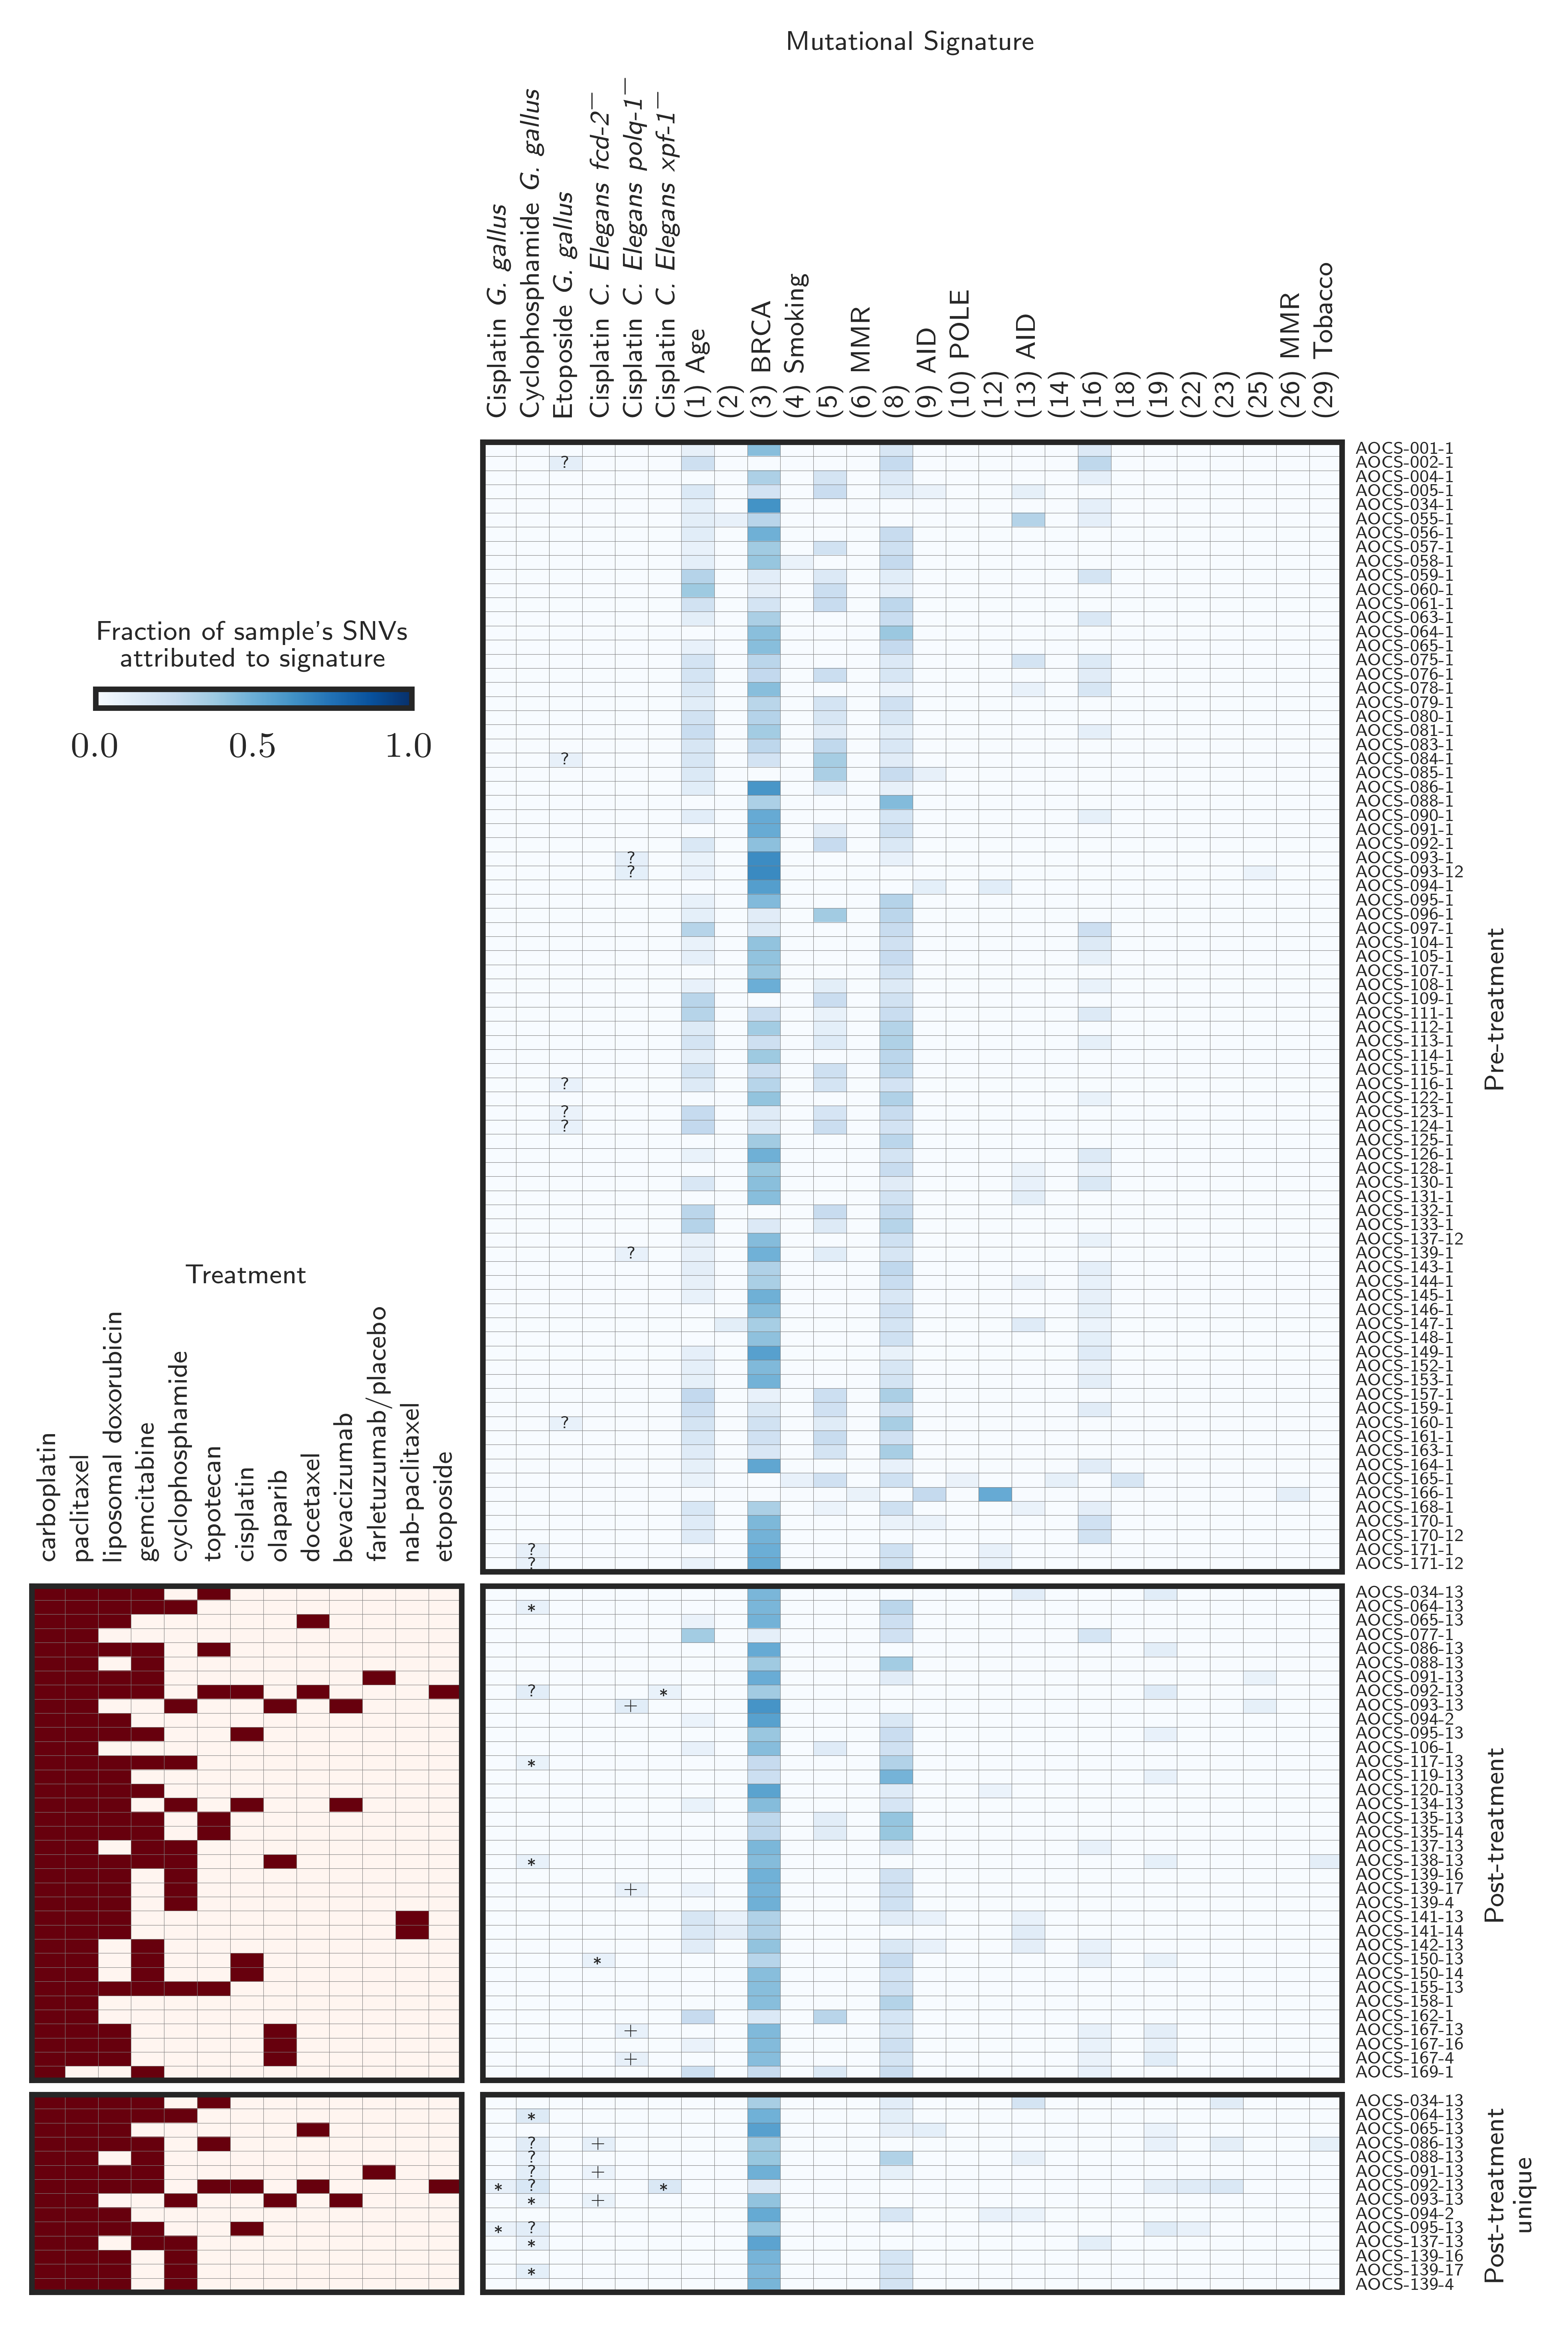

In [76]:
axs = draw_from_chunks([
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", df.ix[(df.kind == "all") & (~df.treated)]),
    ("Post-treatment", (df.ix[(df.kind == "all") & (df.treated)])),
    ("Post-treatment\nunique", (df.ix[(df.kind == "new")]))
], figsize=(5,7.5), symbols=True)
pyplot.tight_layout(h_pad=-7.2, w_pad=0.5)

pyplot.savefig("../figures/supplementary_signatures.pdf")

Removing columns: Signature 2, Signature 4, Signature 6, Signature 10, Signature 14, Signature 18, Signature 26, Etoposide Gallus gallus
[<matplotlib.gridspec.SubplotSpec object at 0x11329e850>, <matplotlib.gridspec.SubplotSpec object at 0x1137bb0d0>, <matplotlib.gridspec.SubplotSpec object at 0x117960d90>, <matplotlib.gridspec.SubplotSpec object at 0x1179609d0>]


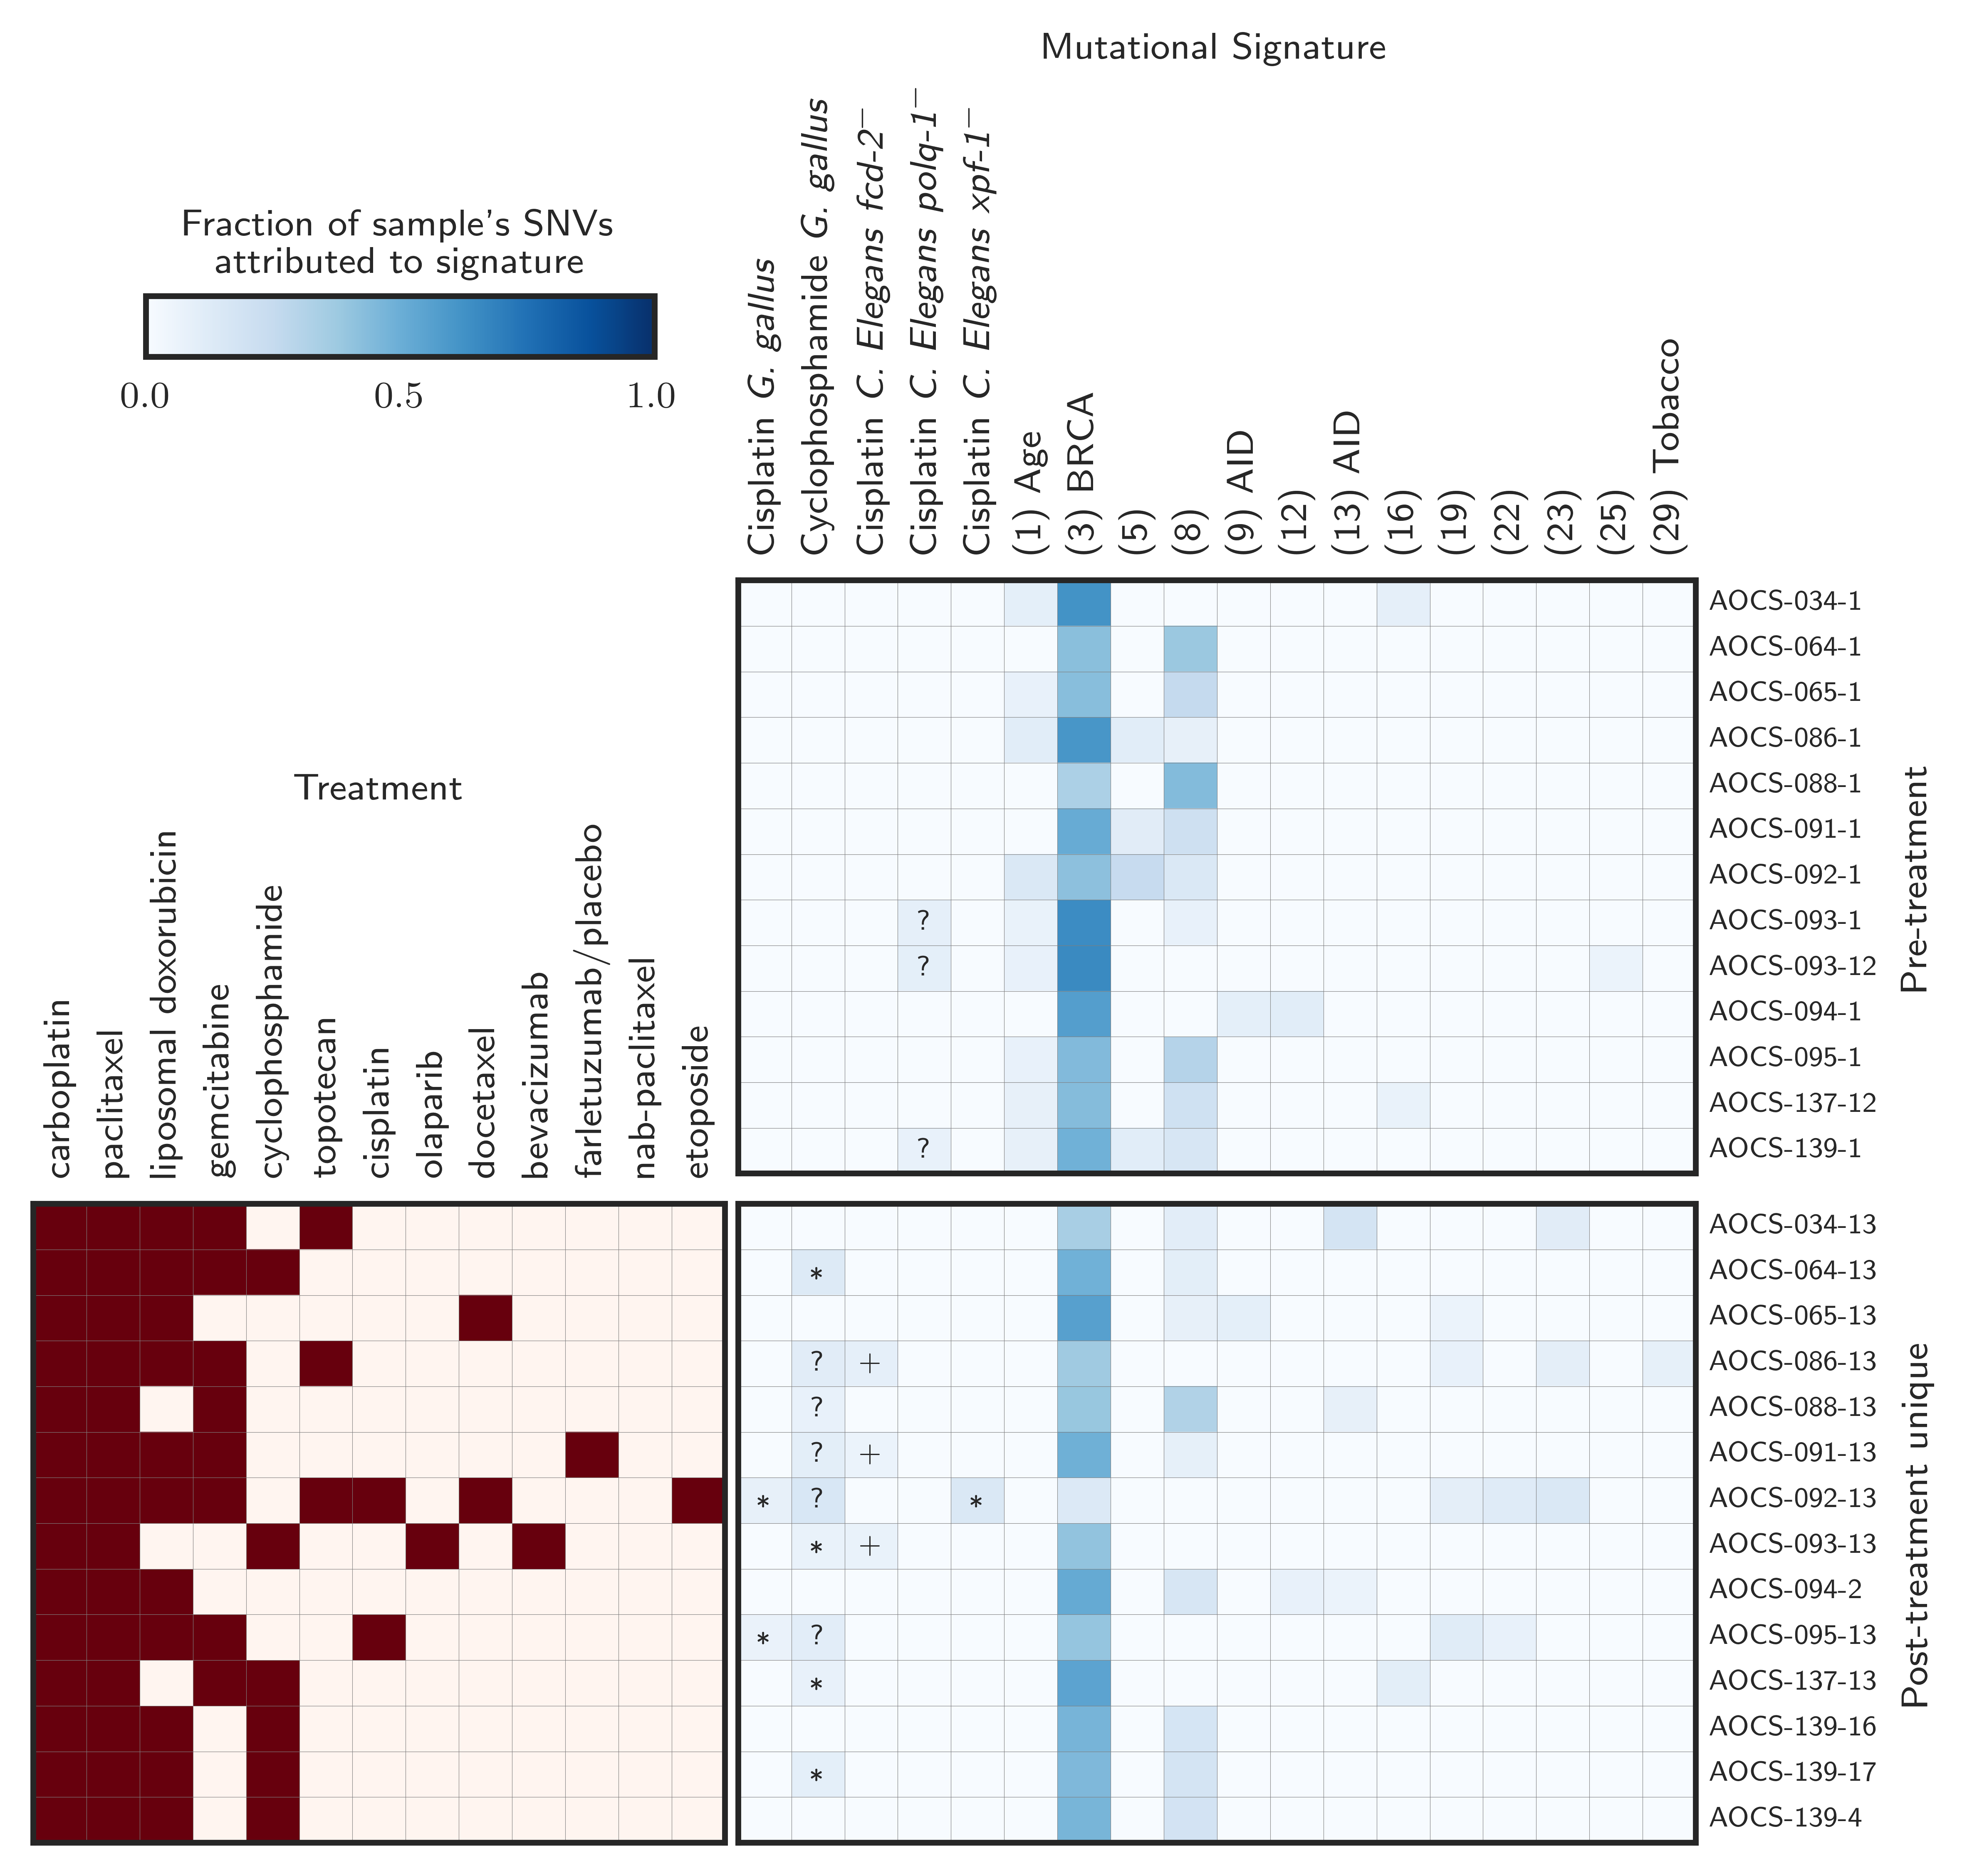

In [80]:
donors_with_new = set("-".join(x[0].split("-")[:2]) for x in df.ix[df.kind == "new"].index)
sub_df = df.ix[["-".join(x[0].split("-")[:2]) in donors_with_new for x in df.index]]
axs = draw_from_chunks([
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", sub_df.ix[(sub_df.kind == "all") & (~sub_df.treated)]),
#    ("Post-treatment", (sub_df.ix[(sub_df.kind == "all") & (sub_df.treated)])),
    ("Post-treatment unique", (sub_df.ix[(sub_df.kind == "new")]))
], figsize=(6,6), cbar=True, cbar_bbox_to_anchor=(-0.125, 1.5, 1.05, 0.95), symbols=True, small_fontsize=6)
pyplot.tight_layout(h_pad=-9.0, w_pad=0.3)
pyplot.savefig("../figures/signatures.pdf")


In [14]:
df.ix[~df.treated][signatures].mean(0).sort(inplace=False, ascending=False)

Signature 3                       0.331530
Signature 8                       0.189287
Signature 1                       0.117205
Signature 5                       0.083597
Signature 16                      0.052752
Signature 13                      0.014149
Signature 12                      0.009575
Signature 9                       0.006897
Etoposide Gallus gallus           0.005859
Cisplatin C Elegans polq 1        0.003143
Signature 2                       0.002135
Signature 18                      0.002041
Cyclophosphamide Gallus gallus    0.001886
Signature 4                       0.001726
Signature 26                      0.001185
Signature 14                      0.001030
Signature 10                      0.000816
Signature 6                       0.000796
Signature 25                      0.000766
Cisplatin C Elegans xpf 1         0.000000
Cisplatin C Elegans fcd 2         0.000000
Signature 29                      0.000000
Signature 19                      0.000000
Signature 2

In [11]:
for base_sigs in [["Signature 1"], ["Signature 3"], ["Signature 8"], ["Signature 1", "Signature 3", "Signature 8"]]:
    print(base_sigs)
    print("All",
        mean_with_errorbars(df.ix[(df.kind == "all")][base_sigs].sum(1), decimals=3))
    print("Treated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (df.treated)][base_sigs].sum(1), decimals=3))
    print("Untreated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (~df.treated)][base_sigs].sum(1), decimals=3))
    print("New",
        mean_with_errorbars(df.ix[(df.kind == "new") & (df.treated)][base_sigs].sum(1), decimals=3))
    print("")


['Signature 1']
('All', '0.096 (0.082 - 0.110)')
('Treated', '0.046 (0.025 - 0.071)')
('Untreated', '0.117 (0.101 - 0.134)')
('New', '0.000 (0.000 - 0.000)')

['Signature 3']
('All', '0.351 (0.328 - 0.375)')
('Treated', '0.397 (0.365 - 0.428)')
('Untreated', '0.332 (0.300 - 0.362)')
('New', '0.430 (0.382 - 0.471)')

['Signature 8']
('All', '0.188 (0.172 - 0.204)')
('Treated', '0.185 (0.152 - 0.217)')
('Untreated', '0.189 (0.172 - 0.207)')
('New', '0.098 (0.059 - 0.140)')

['Signature 1', 'Signature 3', 'Signature 8']
('All', '0.635 (0.616 - 0.653)')
('Treated', '0.627 (0.600 - 0.653)')
('Untreated', '0.638 (0.614 - 0.661)')
('New', '0.528 (0.455 - 0.592)')



In [12]:
df.columns

Index([u'Signature 1', u'Signature 2', u'Signature 3', u'Signature 4',
       u'Signature 5', u'Signature 6', u'Signature 8', u'Signature 9',
       u'Signature 10', u'Signature 12', u'Signature 13', u'Signature 14',
       u'Signature 16', u'Signature 18', u'Signature 19', u'Signature 22',
       u'Signature 23', u'Signature 25', u'Signature 26', u'Signature 29',
       u'Cisplatin Gallus gallus', u'Cyclophosphamide Gallus gallus',
       u'Etoposide Gallus gallus', u'Cisplatin C Elegans fcd 2',
       u'Cisplatin C Elegans polq 1', u'Cisplatin C Elegans xpf 1', u'kind',
       u'source_id', u'treated'],
      dtype='object')

In [13]:
df.ix[df["Cisplatin Gallus gallus"] > 0]

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans fcd 2,Cisplatin C Elegans polq 1,Cisplatin C Elegans xpf 1,kind,source_id,treated
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-092-13/SP101630,new,0,0,0.133002,0,0,0,0,0,0,0,0,0,0,0,0.094217,0.120342,0.141969,0,0,0,0.080833,0.152453,0,0,0,0.145093,new,AOCS-092-13/SP101630,True
AOCS-095-13/SP101650,new,0,0,0.394736,0,0,0,0,0,0,0,0,0,0,0,0.115420,0.072582,0.000000,0,0,0,0.064317,0.104622,0,0,0,0.000000,new,AOCS-095-13/SP101650,True
